In [1]:
from rescure import initial_random_matrix
from rescure import get_rates_simplified
from rescure import get_rates_phenol
from rescure import choose_event
import numpy as np

In [2]:
ratio = (1, 2, 1)

inital_state = initial_random_matrix(15, ratio)

print(inital_state)

[[1. 1. 0. 1. 1. 0. 2. 0. 0. 1. 1. 2. 2. 0. 0.]
 [0. 2. 1. 0. 1. 2. 0. 1. 0. 1. 0. 1. 2. 1. 1.]
 [1. 2. 0. 1. 2. 1. 1. 0. 2. 1. 1. 0. 1. 1. 2.]
 [2. 0. 2. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 2. 1.]
 [1. 2. 2. 1. 1. 2. 1. 1. 1. 1. 2. 1. 0. 2. 0.]
 [1. 2. 1. 2. 1. 1. 2. 1. 2. 0. 0. 0. 1. 1. 1.]
 [1. 0. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 1. 1.]
 [1. 1. 2. 1. 1. 0. 0. 2. 1. 1. 1. 1. 1. 2. 1.]
 [2. 2. 2. 2. 1. 0. 1. 2. 0. 2. 1. 1. 1. 1. 1.]
 [0. 2. 2. 0. 1. 1. 2. 0. 1. 1. 2. 1. 1. 1. 0.]
 [1. 0. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 0. 2.]
 [2. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 2. 0. 1. 0.]
 [2. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 2. 2. 1.]
 [0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 2. 1.]]


In [3]:
# Test to see if the distrubution is the correct ratio:

n = len(inital_state)

voids = []
phenols = []
coals = []

for i in range(n):
    for j in range(n):
        if inital_state[i][j] == 0:
            voids.append((i, j))
        elif inital_state[i][j] == 1:
            phenols.append((i, j))
        elif inital_state[i][j] == 2:
            coals.append((i, j))

print(len(voids))
print(len(phenols))
print(len(coals))

# Looks like it's working!

53
123
49


Let's test the kernel / filter:

In [4]:
start_mol = (5, 4)
i, j = start_mol

periphery = []

for k in range(i-1, j+2):
    for l in range(j-1, j+2):
        periphery.append(initial_state[k, l]) #NOT WORKING

# Reshape the periphery array to be a 3x3 array:

# periphery = np.array(periphery).reshape(3, 3)
print(periphery)

[1.0, 1.0, 2.0, 2.0, 1.0, 1.0]


In [5]:
# Different method of setting up the kernel / mask:

start_mol = (5, 4)
i, j = start_mol

kernel = np.zeros((3, 3))

kernel[0, 0] = 1 # Still need to figure out how to do this automatically

Testing a simple rate function calculator:

In [6]:
# Let's say that the position of the molecule
# we are looking at is (5, 4) in the initial state
# matrix:

pos = (5, 4)

rate_matrix = get_rates_simplified(initial_state, pos)
print(rate_matrix)

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]


In [7]:
state = initial_state

pos_1 = (3, 6)
pos_2 = (8, 12)
pos_3 = (13, 2)

T = 1

rates_1 = get_rates_phenol(state, pos_1, T)
rates_2 = get_rates_phenol(state, pos_2, T)
rates_3 = get_rates_phenol(state, pos_3, T)

print(rates_1)
print("\n")
print(rates_2)
print("\n")
print(rates_3)

(3.04, 0.03999999999999998, 0, 0.0, 0.0, 0.2, 0.2, 0.2, 0.0, 0.0, 0.0, [(2, 5), (2, 6), (2, 7), (3, 5), (3, 7), (4, 5), (4, 6), (4, 7)], [1.0, 1.0, 0.0, 0.0, 0.0, 2.0, 1.0, 1.0])


(5.32, 0.03999999999999998, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, [(7, 11), (7, 12), (7, 13), (8, 11), (8, 13), (9, 11), (9, 12), (9, 13)], [1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0])


(4.5600000000000005, 0.0, 0, 0.0, 0.0, 0.16666666666666666, 0.0, 0.0, 0.0, 0.16666666666666666, 0.0, [(12, 1), (12, 2), (12, 3), (13, 1), (13, 3), (14, 1), (14, 2), (14, 3)], [1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0])


In [8]:
event1 = choose_event(rates_1[0:11])
event2 = choose_event(rates_2[0:11])
event3 = choose_event(rates_3[0:11])

print(event1)
print(event2)
print(event3)

move_ur
pp_rxn
pp_rxn


# Let's test the simulation:

In [1]:
import rescure

In [9]:
n = 20
ratio = (30, 2, 1) # (voids, phenols, coals)
T = 300
n_iter = 30

state_list, temps, crosslinks, coal_rxn, heat_rxn, = rescure.resin_cure_simulation(n, ratio, T, n_iter)

print(temps)
print(crosslinks)
print(coal_rxn)
print(heat_rxn)


[300, 300.00804, 300.0089, 300.0089, 300.0089, 300.0089, 300.0089, 300.0089, 300.0089, 300.0089, 300.0089, 300.0089, 300.00905, 300.00905, 300.00905, 300.00905, 300.00905, 300.00905, 300.00905, 300.00905, 300.00905, 300.00905, 300.00905, 300.00905, 300.00905, 300.00905, 300.00905, 300.00905, 300.00905, 300.00905, 300.00905]
[18, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.008039999999999999, 0.00086, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00015, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Success! For now.

In [12]:
state_1 = state_list[0]
state_2 = state_list[-1]

print(state_1)
print("\n")
print(state_2)

[[0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 0. 0. 0. 1. 0. 0. 0.

Can we turn this into a heatmap?

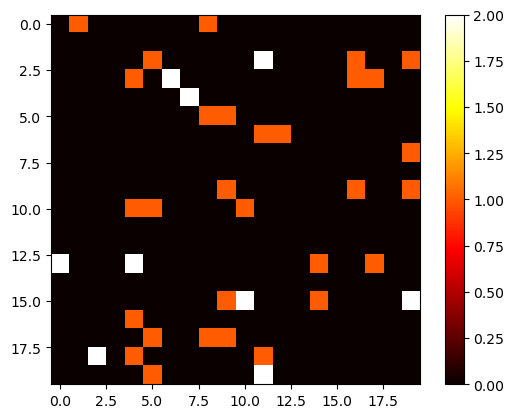

In [11]:
# Take the states and turn them into heat maps so
# we can visualize them better:

import matplotlib.pyplot as plt

plt.imshow(state_1, cmap='hot', interpolation='nearest')
plt.colorbar()

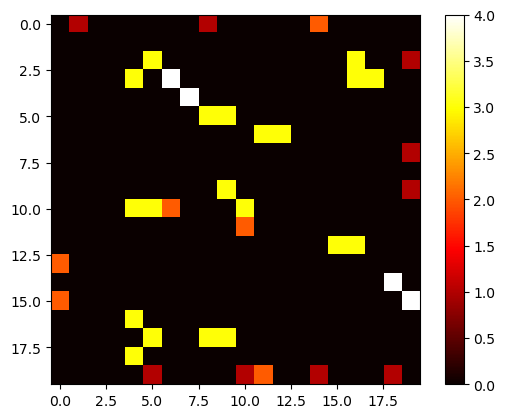

In [17]:
plt.imshow(state_2, cmap='hot', interpolation='nearest')
plt.colorbar()